<center><font size=5>ECE720X50 - Mini Project 1</font></center>
<center><font size=5>TASK 2</font></center>

<center><b>Group Member: Zhaoyi Wang, Jiyuan Zhao, Yafei Sun</b></center>
<center><b> Group Contact Information: zhaoyi5@ualberta.ca </b></center>

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LogisticRegression

## Preparation
### Prepare ionosphere database

In [4]:
ionosphere = pd.read_csv('../Database/ionosphere_data.csv')

In [5]:
ionosphere.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,category
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [6]:
# We find that the second column has all values of 0 and does not contribute anything, so it is deleted.
ionosphere = ionosphere.drop(columns=['feature2'])
ionosphere

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,category
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


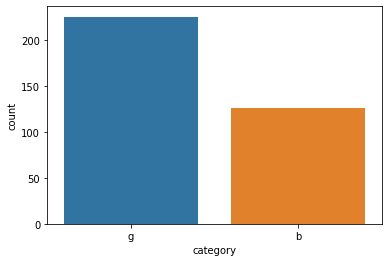

In [7]:
sns.countplot(x='category', data=ionosphere)

In [8]:
# Mapping of category variables to numbers：good -> 1, bad -> 0
category_to_class = {'g': 1, 'b': 0}
ionosphere['class'] = ionosphere['category'].map(category_to_class)
ionosphere.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,category,class
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g,1
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b,0
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g,1
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b,0
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g,1


### Feature Selection
* Step 1: Find the right degree to use
* Step 2: Determine which features are most significant

In [9]:
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import PolynomialFeatures

In [10]:
x = ionosphere.drop(columns=['category', 'class'])
y = ionosphere.loc[:, 'class']

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


def compute_mse_cv(X, Y, n_degree):
    mse = []
    std = []
    for degree in range(1, n_degree):
        poly_features = PolynomialFeatures(degree=degree)
        logisticreg = LogisticRegression()
        pipeline = Pipeline([("polynomial_features", poly_features),
                             ("Logistic Regression", logisticreg)])
        pipeline.fit(X, Y)

        # Evaluate the models using crossvalidation
        scores = cross_val_score(pipeline,
                                 X,
                                 Y,
                                 scoring="neg_mean_squared_error",
                                 cv=10,
                                 error_score=np.nan)

        mse.append(-scores.mean())
        std.append(scores.std())
    return mse, std

In [12]:
mse, std = compute_mse_cv(x, y, 4)

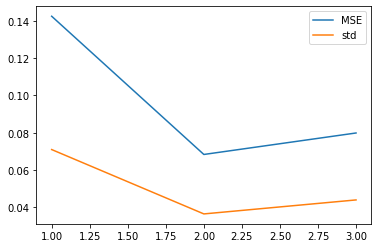

In [13]:
plt.plot(range(1, len(mse) + 1), mse, label='MSE')
plt.plot(range(1, len(std) + 1), std, label='std')
plt.legend()

<b>Based on the result above, here we choose degree=2</b> 

In [14]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(x)
F_test, p_value = f_regression(X_poly, y)
feature_df = pd.DataFrame({
    'feature': poly_features.get_feature_names(),
    'F_test': F_test,
    'p_value': p_value
})
feature_df

,feature,F_test,p_value
0,x0,96.605478,2.747898e-20
1,x1,128.762319,1.294785e-25
2,x2,5.619616,1.830332e-02
3,x3,126.961973,2.514817e-25
4,x4,7.934810,5.125150e-03
...,...,...,...
589,x30 x31,5.156894,2.376303e-02
590,x30 x32,3.201518,7.443698e-02
591,x31^2,1.793455,1.813773e-01
592,x31 x32,0.335248,5.629588e-01


In [15]:
from sklearn.feature_selection import SelectKBest

<b>Here we select the top two most important factors</b>

In [16]:
X_best = SelectKBest(f_regression, 2).fit_transform(X_poly, y)

In [17]:
print('Best Two: Shape:', X_best.shape, 'Feature:',
      SelectKBest(f_regression, 2).fit(X_poly, y).get_support(indices=True))

Best Two: Shape: (351, 2) Feature: [34 36]


In [18]:
print(feature_df.loc[34])
print('------------')
print(feature_df.loc[36])

feature          x0 x1
F_test          245.22
p_value    3.08919e-42
Name: 34, dtype: object
------------
feature          x0 x3
F_test         250.096
p_value    7.38123e-43
Name: 36, dtype: object


By applying FEATURE SELECTION, we know that the most important two factors are x0x1(FEATURE_1&3) and x0x3(FEATURE_1&5)

In [19]:
data = X_best

## Logistic Regression

In [20]:
# Variable assignment
x1 = data
y1 = ionosphere.loc[:, 'class']

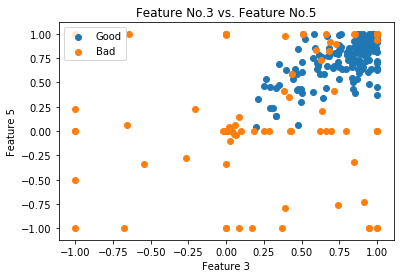

In [21]:
mask = ionosphere.loc[:, 'class'] == 1
good = plt.scatter(x1[:, 0][mask], x1[:, 1][mask])
bad = plt.scatter(x1[:, 0][~mask], x1[:, 1][~mask])
plt.title('Feature No.3 vs. Feature No.5')
plt.xlabel('Feature 3')
plt.ylabel('Feature 5')
plt.legend((good, bad), ('Good', 'Bad'))

In [22]:
# There is actually no need to specify parameters here, as they are all default options
log_model = LogisticRegression(penalty='l2', solver='lbfgs')
# Training Model
log_model.fit(x1, y1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
# Calculate the predicted value
y1_predict = log_model.predict(x1)

In [54]:
from sklearn.metrics import f1_score
# Calculation Accuracy
log_model_accuracy = f1_score(y1, y1_predict, average='macro')
print('F1-macro of logistic regression:', log_model_accuracy, '/ 1.00')

F1-macro of logistic regression: 0.8519258987527514 / 1.00


In [25]:
# Model testing: assigning test data
y1_test = np.array(pd.DataFrame(x1).iloc[2])

In [26]:
# Model testing: view test results
y1_result = log_model.predict([y1_test])
print('The result of y1_test data is:', 'good' if y1_result == 1 else 'bad')

The result of y1_test data is: good


In [27]:
# View Parameters
print('Coef:', log_model.coef_, 'Intercept:', log_model.intercept_)

Coef: [[2.44153902 2.19166673]] Intercept: [-2.01496216]


## Support vector machine

In [28]:
from sklearn.svm import SVC

In [29]:
x2 = data
y2 = ionosphere.loc[:, 'class']

In [30]:
# Training Model
svc_work_list = [
    SVC(),
    SVC(kernel='poly'),
    SVC(kernel='linear'),
    SVC(kernel='sigmoid')
]

In [55]:
# Calculation Accuracy
result_svc_acc = []

for model in svc_work_list:
    model.fit(x2, y2)
    y22_pred = model.predict(x2)
    accuracy = f1_score(y2, y22_pred, average='macro')
    result_svc_acc.append(accuracy)

In [56]:
result_svc = {
    'F1-macro for Default(rbf):': result_svc_acc[0],
    'F1-macro for Poly:': result_svc_acc[1],
    'F1-macro for Linear:': result_svc_acc[2],
    'F1-macro for Sigmoid:': result_svc_acc[3]
}
result_svc

{'F1-macro for Default(rbf):': 0.8925759332251333,
 'F1-macro for Poly:': 0.8294934073560027,
 'F1-macro for Linear:': 0.8521302788881919,
 'F1-macro for Sigmoid:': 0.8072834627951144}

After we tried different kernels, we found that the default case (rbf) performed the best

In [33]:
def plot_svm_decision_margin(model, plot_support=True):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X,
               Y,
               P,
               colors='k',
               levels=[-1, 0, 1],
               alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=200,
                   linewidth=1,
                   edgecolors='black',
                   facecolors='none')

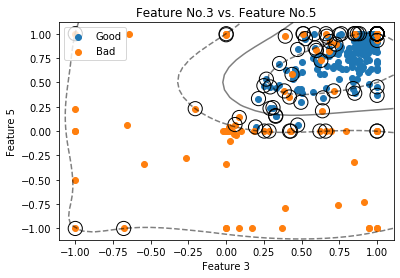

In [34]:
# Mapping decision boundaries
mask = ionosphere.loc[:, 'class'] == 1
good = plt.scatter(x1[:, 0][mask], x1[:, 1][mask])
bad = plt.scatter(x1[:, 0][~mask], x1[:, 1][~mask])

plot_svm_decision_margin(svc_work_list[0])  # svc_work_list[0] -> Default Model, the 1st one

plt.title('Feature No.3 vs. Feature No.5')
plt.xlabel('Feature 3')
plt.ylabel('Feature 5')
plt.legend((good, bad), ('Good', 'Bad'))

## Random Forest

In [35]:
x3 = data
y3 = ionosphere.loc[:, 'class']

In [36]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=50,
                                             random_state=0,
                                             max_depth=12)
random_forest_model.fit(x3, y3)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [37]:
y3_predict = random_forest_model.predict(x3)

In [38]:
print('Accuracy for Random Forest:', accuracy_score(y3, y3_predict), '/1.00')

Accuracy for Random Forest: 0.9658119658119658 /1.00


In [39]:
def plot_decision_sl(X, Y, tree, title):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=Y)
    plt.title(title)

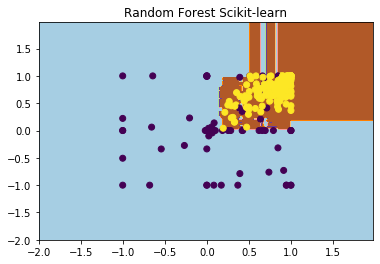

In [40]:
plot_decision_sl(x3, y3, random_forest_model, "Random Forest Scikit-learn")

## Model Comparison
<b> Here we use 10-fold cross validation to evaluate the model. Since these are classification problems, we use f1-macro as the standard. </b>

In [50]:
from sklearn.metrics import r2_score


def cross_validate(model, x_in, y_in, fold_in):

    # cross-validation -> MSE
    score = cross_val_score(model,
                            x_in,
                            y_in,
                            scoring='f1_macro',
                            cv=fold_in,
                            error_score=np.nan)

    return {'F1_macro:': score.mean()}

In [51]:
logistic_regression_score = cross_validate(log_model, x1, y1, 10)
svm_score = cross_validate(svc_work_list[0], x2, y2, 10)
random_forest_score = cross_validate(random_forest_model, x3, y3, 10)

In [52]:
print('logistic regression:', logistic_regression_score)
print('support vector machine:', svm_score)
print('random forest:', random_forest_score)

logistic regression: {'F1_macro:': 0.8471685107396029}
support vector machine: {'F1_macro:': 0.8898143130161765}
random forest: {'F1_macro:': 0.8851539076865164}


<b>Based on the results of F1-macro, we can see that SVM has the best performance. In general, there are no significant differences between the three models.</b>